In [30]:
import os

def rename_files_in_folder(folder_path, target_string, replacement_string, extension_filter=".tif"):
    """
    Renames files in the given folder that contain a specific string.

    Parameters:
    - folder_path (str): Path to the folder containing the files.
    - target_string (str): String to be replaced in filenames.
    - replacement_string (str): String to replace the target string.
    - extension_filter (str, optional): Only files with this extension will be considered. Default is ".tif".
    """

    # Ensure the extension filter starts with a dot
    if extension_filter and not extension_filter.startswith("."):
        extension_filter = f".{extension_filter}"

    # Check if folder exists
    if not os.path.isdir(folder_path):
        print(f"Folder does not exist: {folder_path}")
        return

    # Process each file
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)

        # Check if it's a file and matches the extension
        if os.path.isfile(file_path) and filename.lower().endswith(extension_filter):
            if target_string in filename:
                new_filename = filename.replace(target_string, replacement_string)
                new_file_path = os.path.join(folder_path, new_filename)

                os.rename(file_path, new_file_path)
                print(f"Renamed: {filename} -> {new_filename}")


# Example usage
folder = r"E:\Specimen_Images\A356"
string_to_find = "A356_00C"
string_to_replace = "A356_011"
extension = ".tif"  # or leave as default if you're only using TIFs

rename_files_in_folder(folder, string_to_find, string_to_replace, extension)


Renamed: A356_00C_cross.tif -> A356_011_cross.tif
Renamed: A356_00C_length.tif -> A356_011_length.tif
Renamed: A356_00C_cross_def.tif -> A356_011_cross_def.tif
Renamed: A356_00C_cross_back_def.tif -> A356_011_cross_back_def.tif
Renamed: A356_00C_length_def.tif -> A356_011_length_def.tif


Extracted 15 metadata entries.


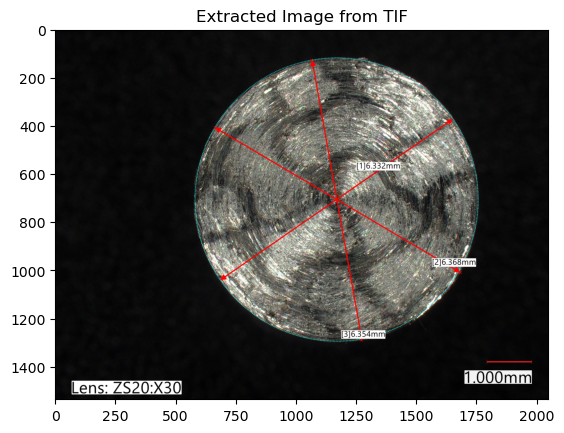

('NewSubfileType', <FILETYPE.UNDEFINED: 0>)
('ImageWidth', 2048)
('ImageLength', 1536)
('BitsPerSample', (8, 8, 8))
('Compression', <COMPRESSION.NONE: 1>)
('PhotometricInterpretation', <PHOTOMETRIC.RGB: 2>)
('StripOffsets', (59360, 71648, 83936, 96224, 108512, 120800, 133088, 145376, 157664, 169952, 182240, 194528, 206816, 219104, 231392, 243680, 255968, 268256, 280544, 292832, 305120, 317408, 329696, 341984, 354272, 366560, 378848, 391136, 403424, 415712, 428000, 440288, 452576, 464864, 477152, 489440, 501728, 514016, 526304, 538592, 550880, 563168, 575456, 587744, 600032, 612320, 624608, 636896, 649184, 661472, 673760, 686048, 698336, 710624, 722912, 735200, 747488, 759776, 772064, 784352, 796640, 808928, 821216, 833504, 845792, 858080, 870368, 882656, 894944, 907232, 919520, 931808, 944096, 956384, 968672, 980960, 993248, 1005536, 1017824, 1030112, 1042400, 1054688, 1066976, 1079264, 1091552, 1103840, 1116128, 1128416, 1140704, 1152992, 1165280, 1177568, 1189856, 1202144, 1214432, 1

In [15]:
import tifffile

def read_tiff_file(file_path):
    """
    Reads a TIF file, extracts the image and embedded metadata if available.
    
    Parameters:
    - file_path (str): Path to the .tif file
    
    Returns:
    - image (numpy.ndarray): The image array.
    - metadata (dict): Any embedded metadata found.
    """

    with tifffile.TiffFile(file_path) as tif:
        # --- Read the main image ---
        image = tif.pages[0].asarray()
        
        # --- Read the embedded metadata ---
        metadata = {}
        if tif.pages[0].tags:
            for tag in tif.pages[0].tags.values():
                tag_name, tag_value = tag.name, tag.value
                metadata[tag_name] = tag_value

        # Some TIFs store extra metadata in "ImageDescription"
        if "ImageDescription" in metadata:
            print("Found Image Description!")
            print(metadata["ImageDescription"])

        print(f"Extracted {len(metadata)} metadata entries.")

    return image, metadata

file = os.path.join(folder, "SS316A356_019_cross.tif")
img, meta = read_tiff_file(file)

# --- Example: Show image ---
import matplotlib.pyplot as plt
plt.imshow(img, cmap="gray")
plt.title("Extracted Image from TIF")
plt.show()

# --- Example: See what metadata was extracted ---
for key, value in meta.items():
    print(f"{key, value}")


In [17]:
def decode_makernote(makernote_data):
    """
    Attempts to decode MakerNote binary data for inspection.
    """
    try:
        # Try decoding as text
        decoded_text = makernote_data.decode('utf-8', errors='ignore')
        return decoded_text
    except Exception as e:
        print(f"Error decoding MakerNote: {e}")
        return None

# --- Usage example ---
maker_note = meta.get("ExifTag", {}).get("MakerNote", None)
if maker_note:
    decoded = decode_makernote(maker_note)
    print(decoded)


KmsFileG              @                	     
                       Q      5 F       G        H     $ I     J            C     N  	       !	       "	       #    8 $	       0    2    4    <    =	       @    C   F D    N E   \ F    d G   r H    z K	        L	       l    v   % z	    
   {	       |	       	       	    a       	       	       	       	       	        	        	       	    
    -           	                     	               @      `           QI  Y	 N             
